#  1. Введение

✍ В прошлом модуле мы с вами поговорили о методах решения задачи регрессии — модели линейной регрессии и производных от неё, а также о проблемах, которые возникают в обучении с учителем, — о дилемме смещения и разброса. Полученные ранее знания очень пригодятся нам в этом модуле, поэтому давайте повторим материал, пройдя небольшое тестирование ↓

В этом модуле мы продолжаем знакомство с моделями МО в области обучения с учителем. На этот раз поговорим о задаче классификации. Вспомним, где находится классификация на нашей карте машинного обучения:

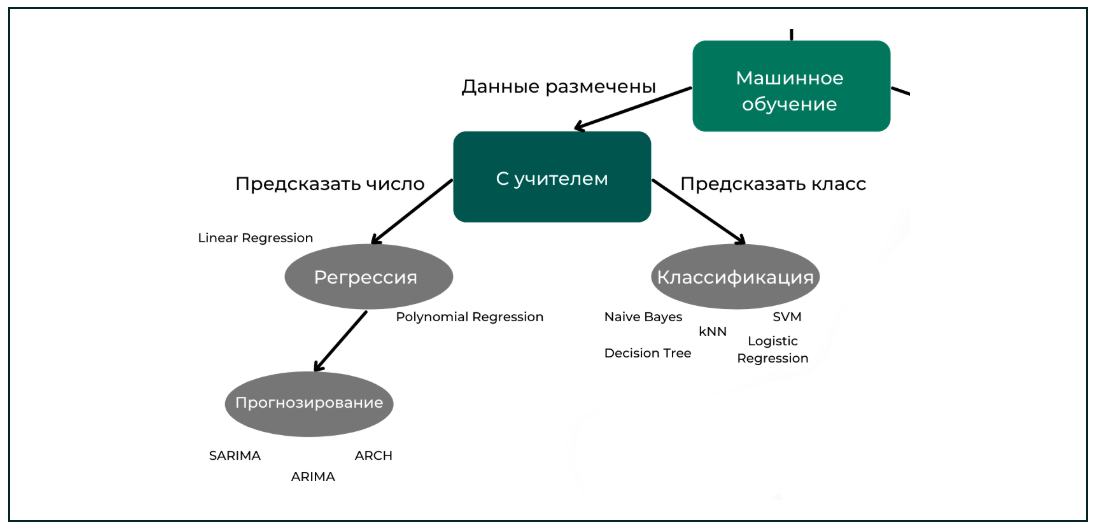

Вначале мы снова обратимся к классу линейных моделей и рассмотрим **логистическую регрессию**.

Затем поговорим о деревьях решений для задачи классификации и научимся строить из этих деревьев целый лес.

Цели данного модуля:

- Познакомиться с принципами работы модели логистической регрессии для решения задачи классификации. 
- Рассмотреть метрики классификации и научиться оценивать качество моделей, решающих данную задачу.
- Узнать принципы построения деревьев решений.
- Изучить основы ансамблевых моделей типа бэггинг на примере случайного леса.
- Научиться применять деревья решений и случайные леса для решения задачи классификации.

# 2. Логистическая регрессия

✍ Ранее мы обсуждали модель линейной регрессии, которая предназначена для решения задачи регрессии. Теперь нам предстоит разобраться с тем, как преобразовать данную модель, чтобы она решала задачу классификации.

Для начала вспомним, что такое классификация.

**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является категориальным.

Когда классов, которые мы хотим предсказать, только два, классификация называется бинарной. Например, мы можем предсказать, болен ли пациент раком, является ли изображение человеческим лицом, является ли письмо спамом и т. д.

Когда классов, которые мы хотим предсказать, более двух, классификация называется мультиклассовой (многоклассовой). Например, предсказание модели самолёта по радиолокационным снимкам, классификация животных на фотографиях, определение языка, на котором говорит пользователь, разделение писем на группы.

→ Для простоты мы пока разберёмся с бинарной классификацией, а в следующем юните обобщим результат на мультиклассовую.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.

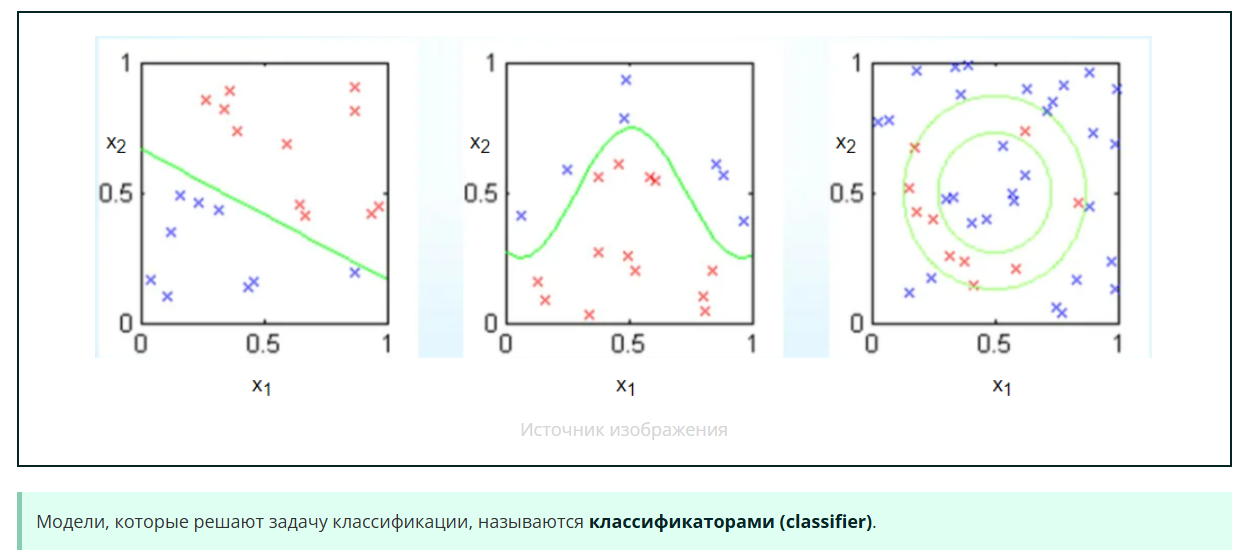

Модели, которые решают задачу классификации, называются классификаторами (classifier).

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

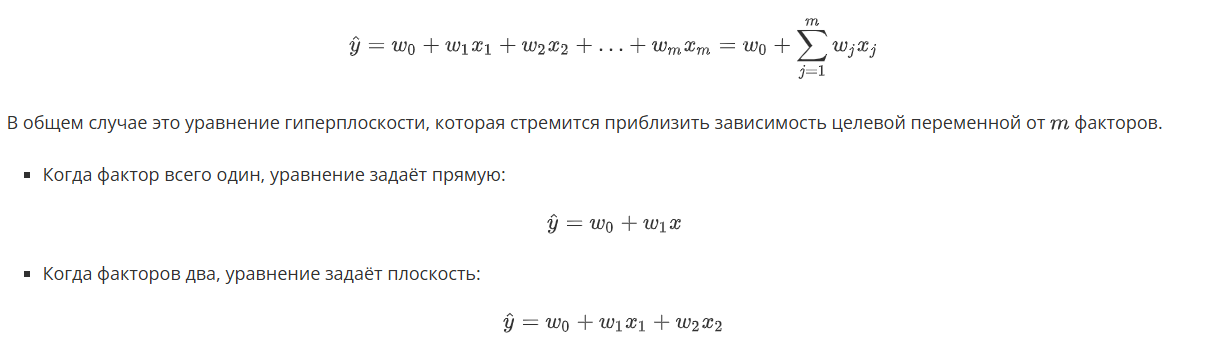

→ Но всё это работает только в том случае, когда целевой признак , который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.

Что же делать с этой моделью, когда целевой признак  является категориальным? Например, является письмо спамом или обычным письмом?

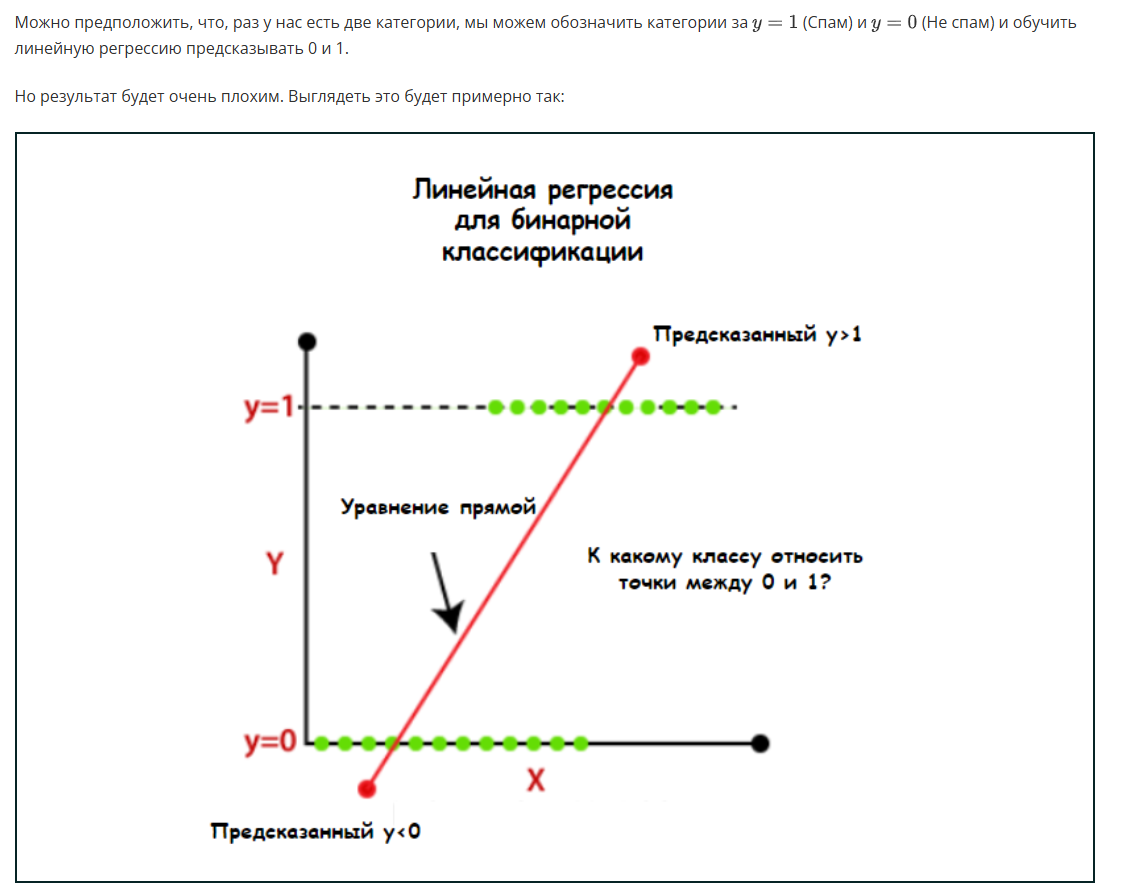

Для больших значений  прямая будет выдавать значения больше 1, а для очень маленьких — меньше 0. Что это значит? Непонятно. Непонятно и то, что делать со значениями в диапазоне от 0 до 1. Да, можно относить значения на прямой выше 0.5 к классу 1, а меньше либо равным 0.5 — к классу 0, но это всё «костыли».

Идея! Давайте переведём задачу классификации в задачу регрессии. Вместо предсказания класса будем предсказывать вероятность принадлежности к этому классу. 

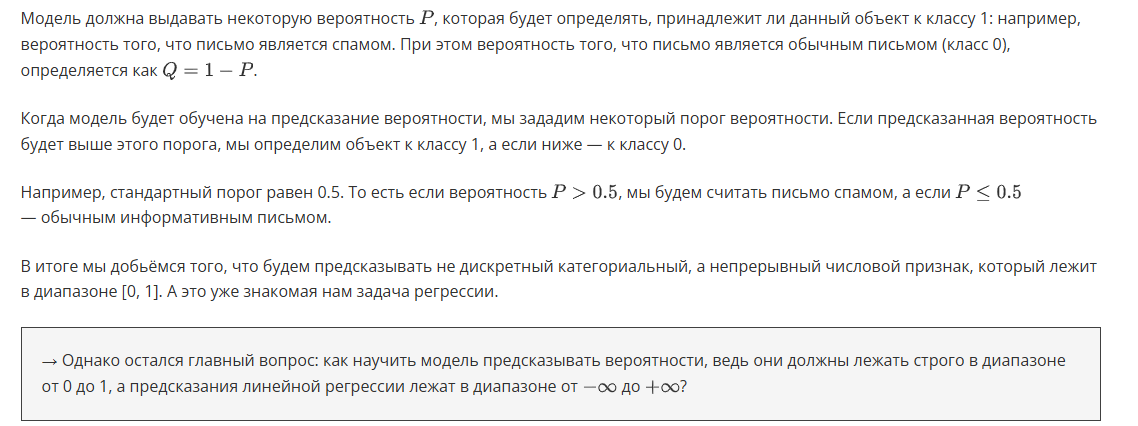

Тут-то мы и приходим к модели логистической регрессии — **регрессии вероятностей**.

### ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

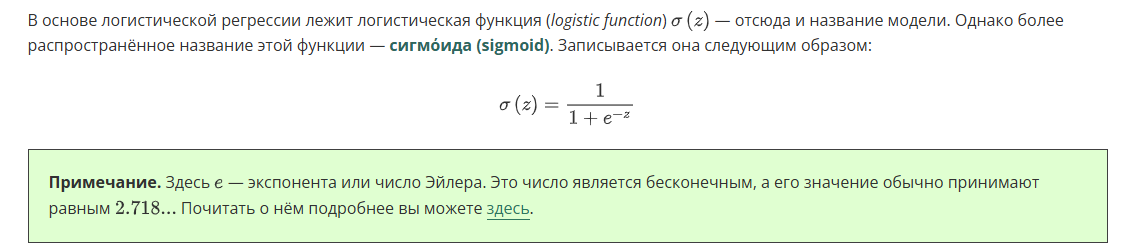

https://dzen.ru/a/XKW4kcYE3AId802p

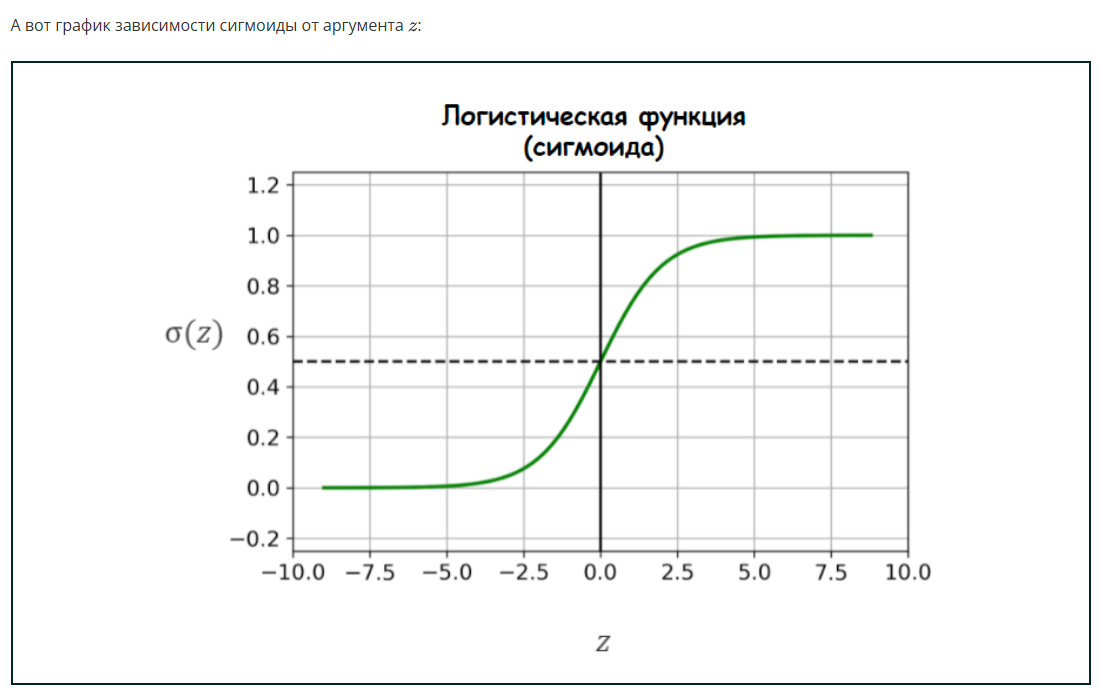

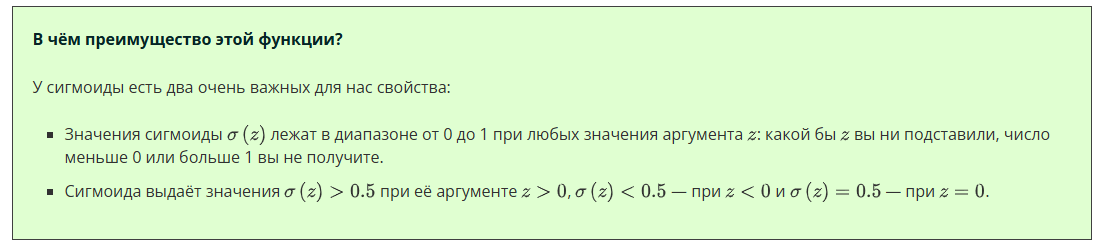

Это ведь и есть свойства вероятности! Выходом сигмоиды является число от 0 до 1, которое можно интерпретировать как вероятность принадлежности к классу 1. Её мы и пытаемся предсказать.

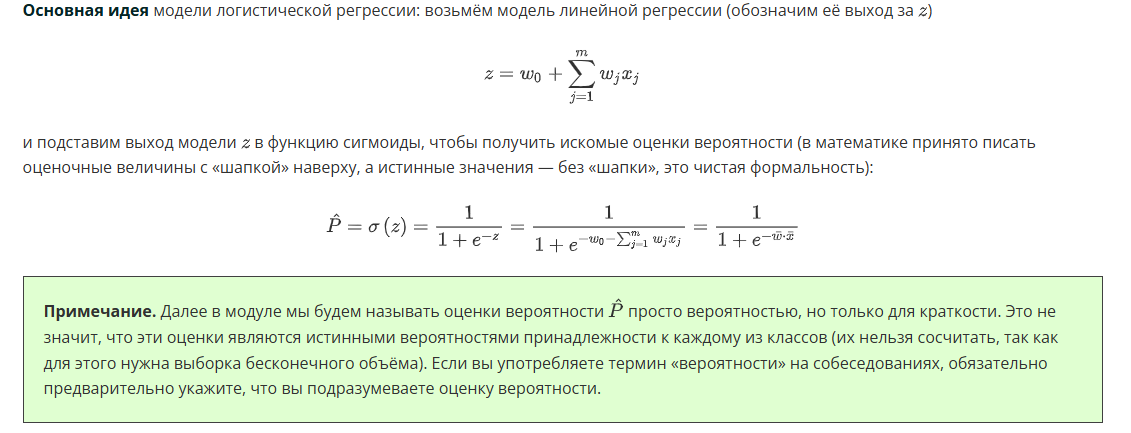

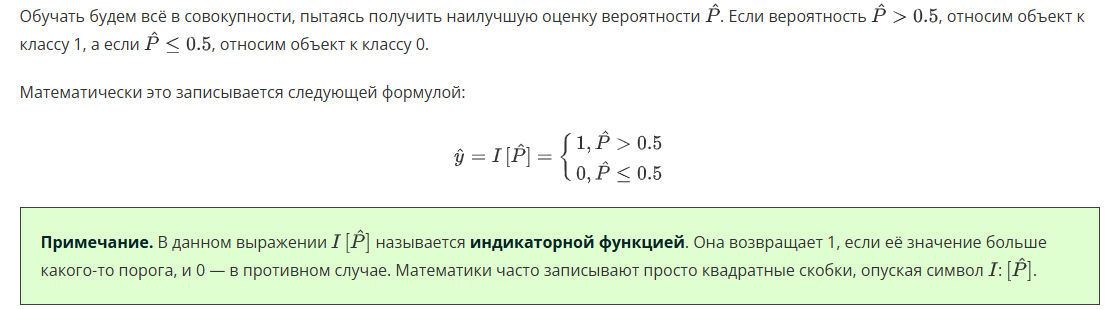

Чего мы добились таким преобразованием?

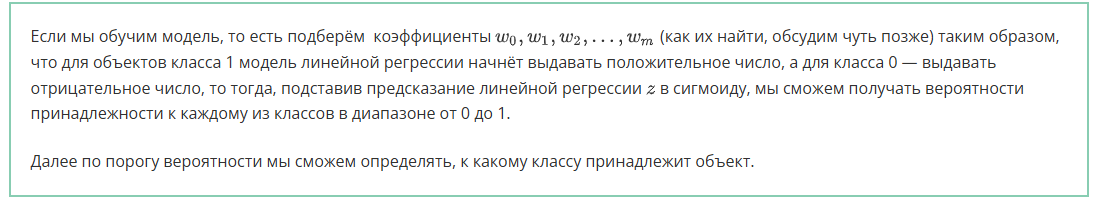

Это и есть наша цель. Мы свели задачу классификации к задаче регрессии для предсказания вероятностей. 

Для бинарной классификации описанное выше будет выглядеть следующим образом:

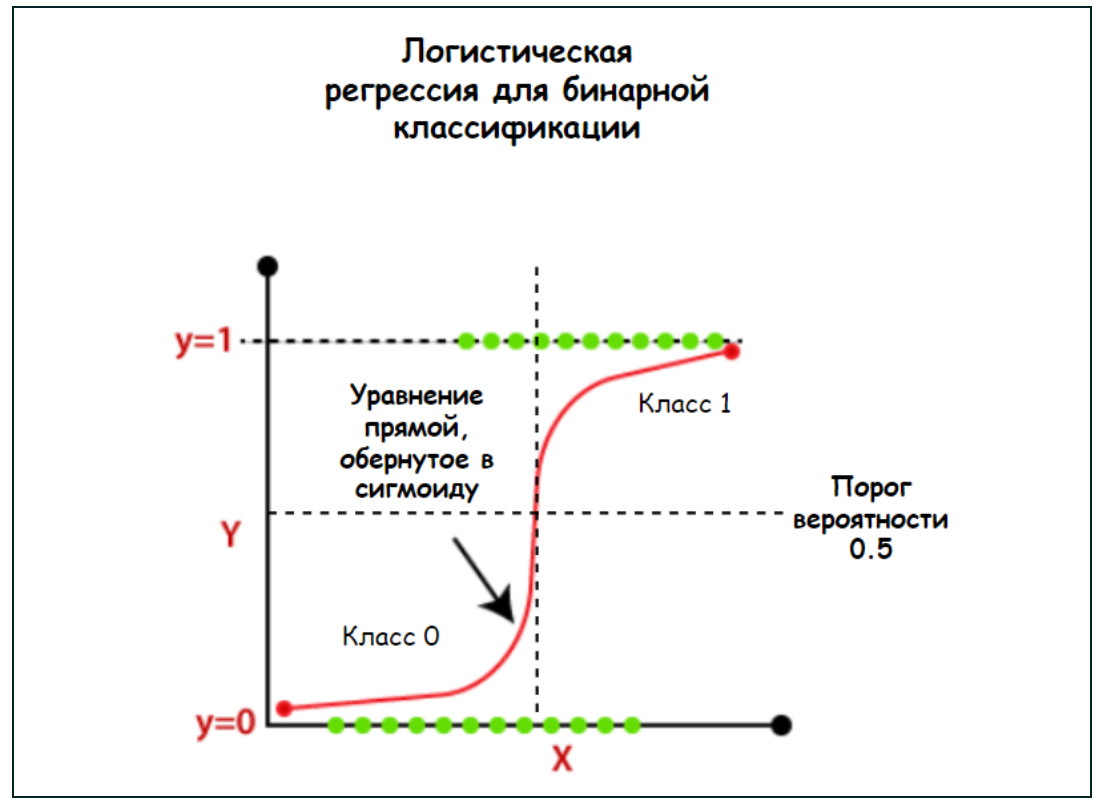

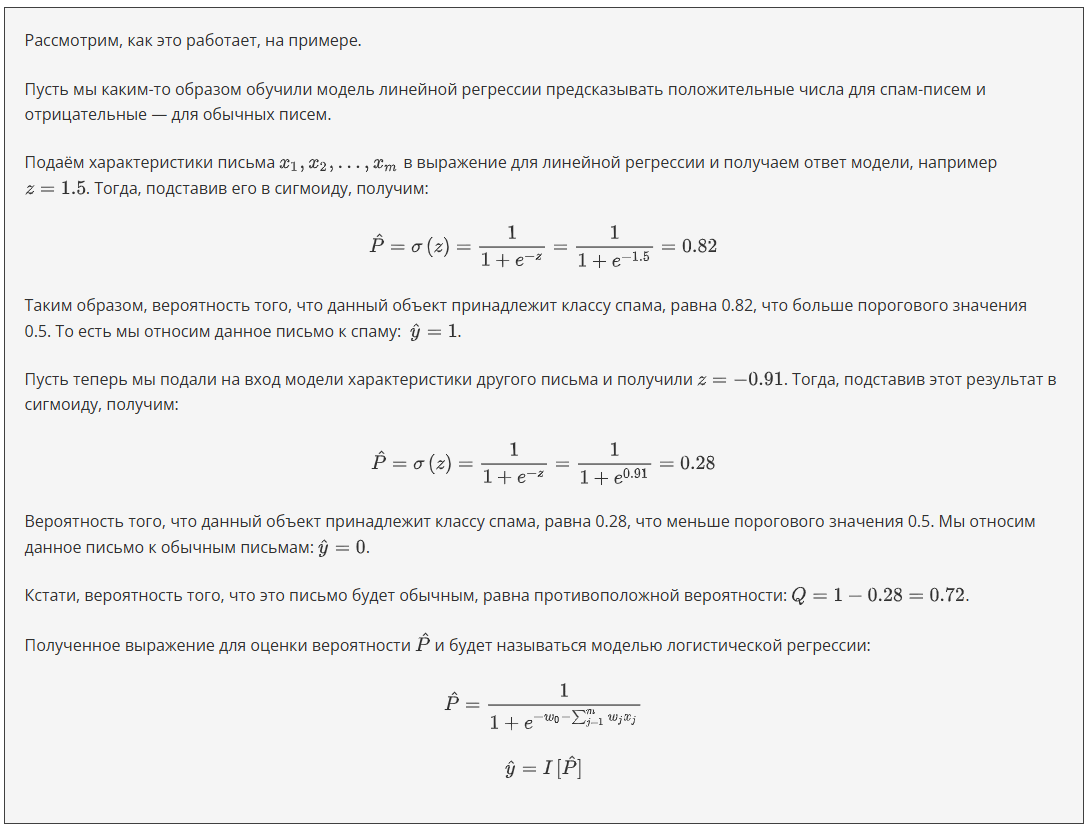

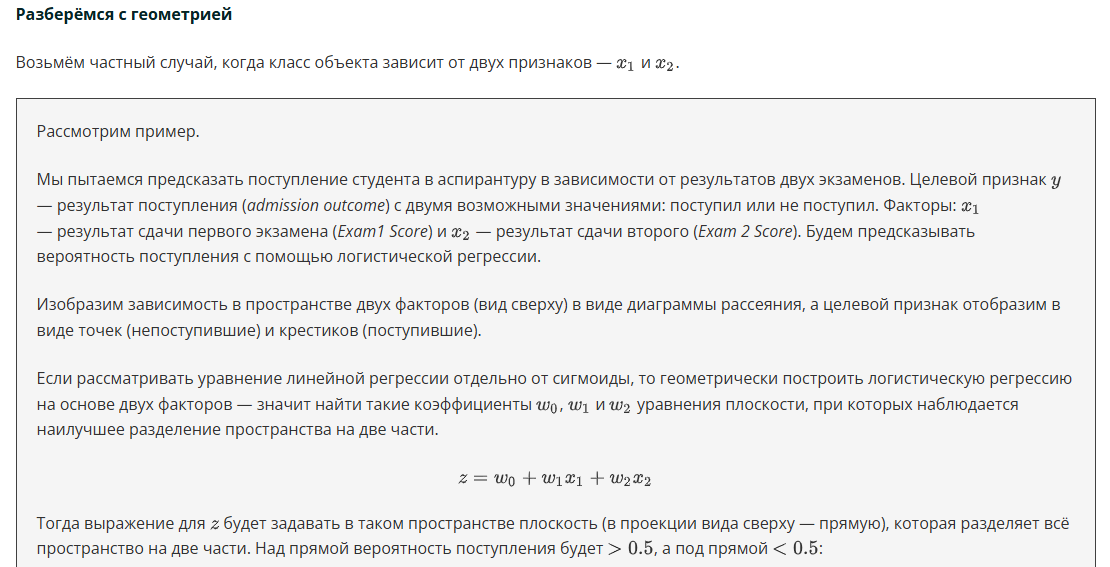

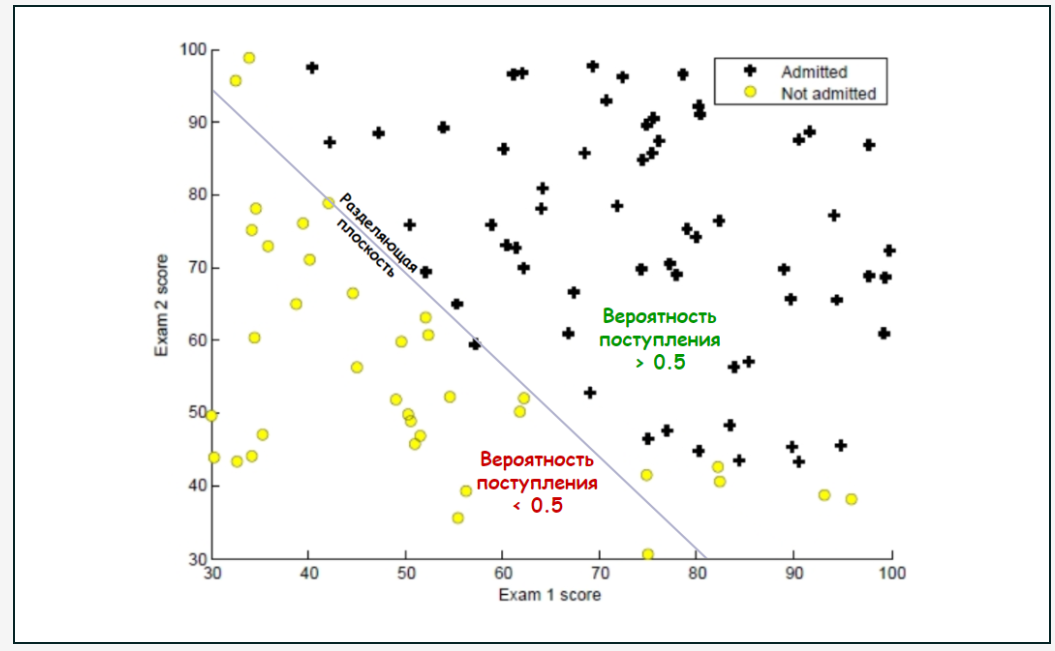

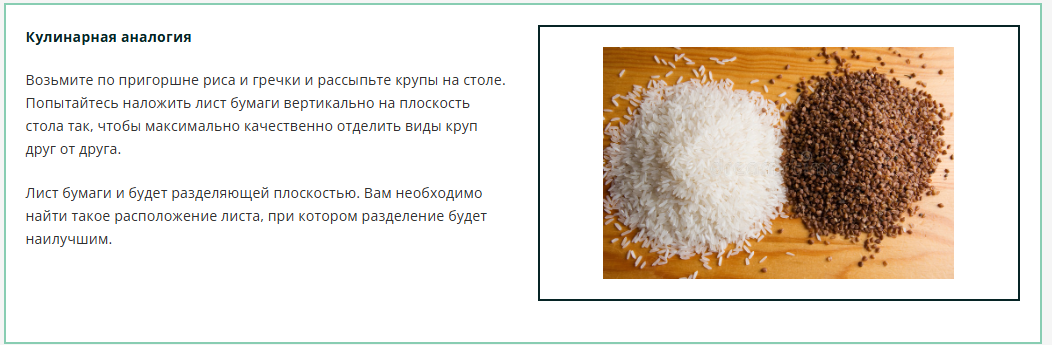

Коэффициенты построенной выше плоскости равны (как их найти, обсудим позже):

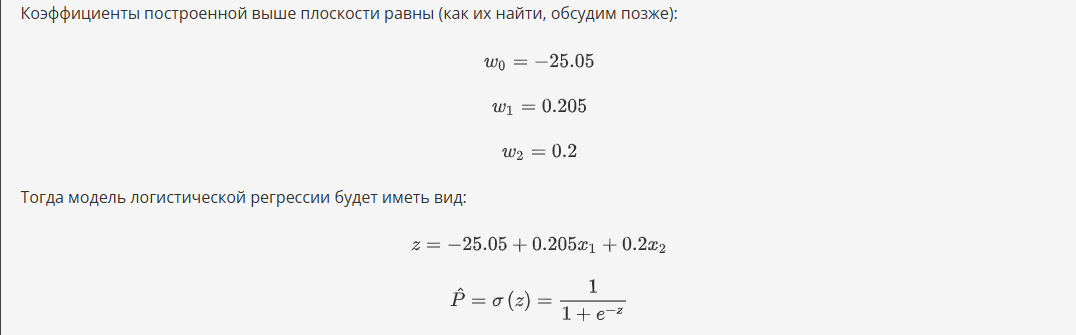

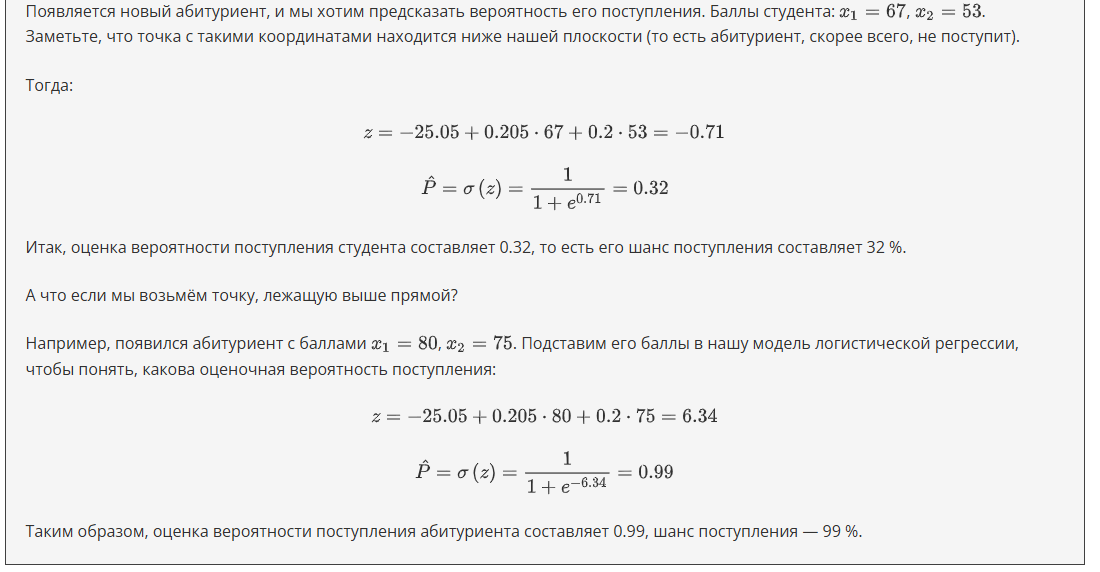

### В чём математический секрет?

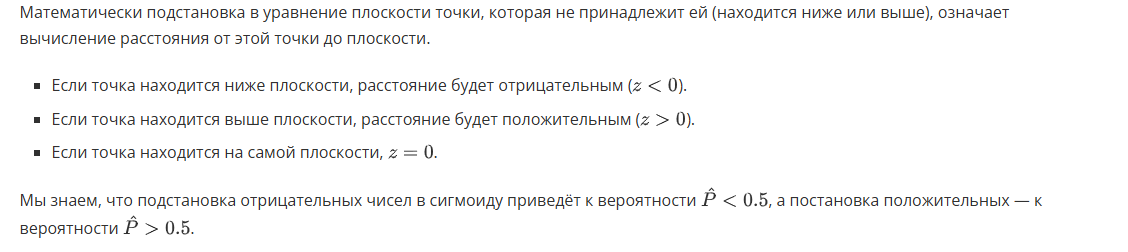

Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом (margin)**.

В этом и состоит секрет работы логистической регрессии.

Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

Попробуйте подставить различные координаты точек в модель логистической регрессии и убедитесь в этом.

Можно построить тепловую карту, которая показывает, чему равны вероятности в каждой точке пространства:

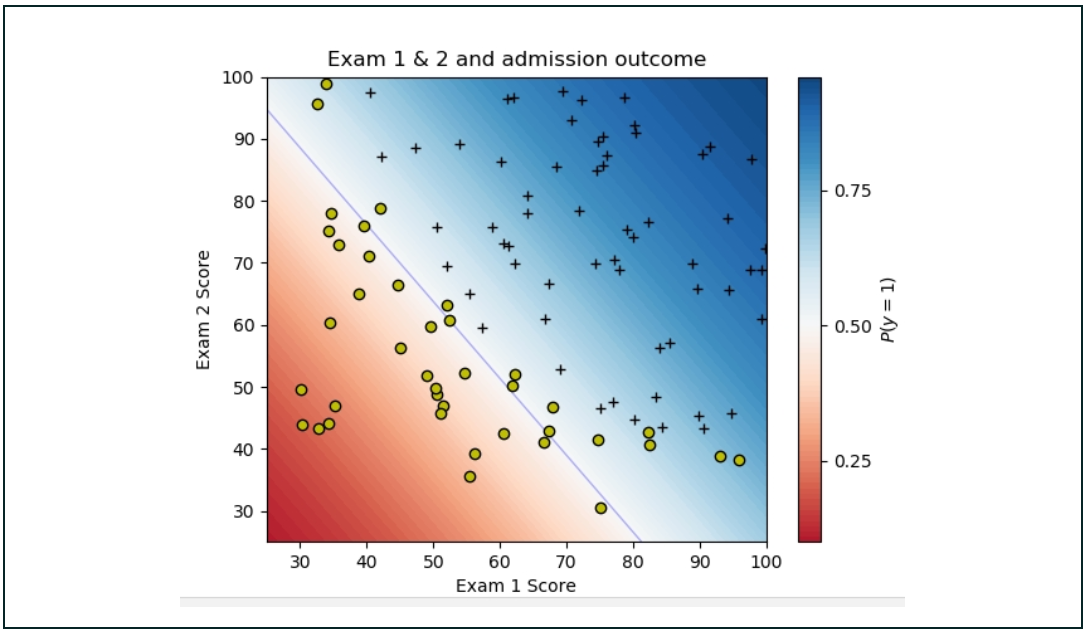

На рисунке точки, которые относятся к классу непоступивших абитуриентов, лежащие ниже разделяющей плоскости, находятся в красной зоне. Чем насыщеннее красный цвет, тем ниже вероятность того, что абитуриент поступит в аспирантуру. И наоборот, точки, которые относятся к классу поступивших абитуриентов, лежащие выше разделяющей плоскости, находятся в синей зоне. Чем насыщеннее синий цвет, тем выше вероятность того, что абитуриент поступит в аспирантуру.

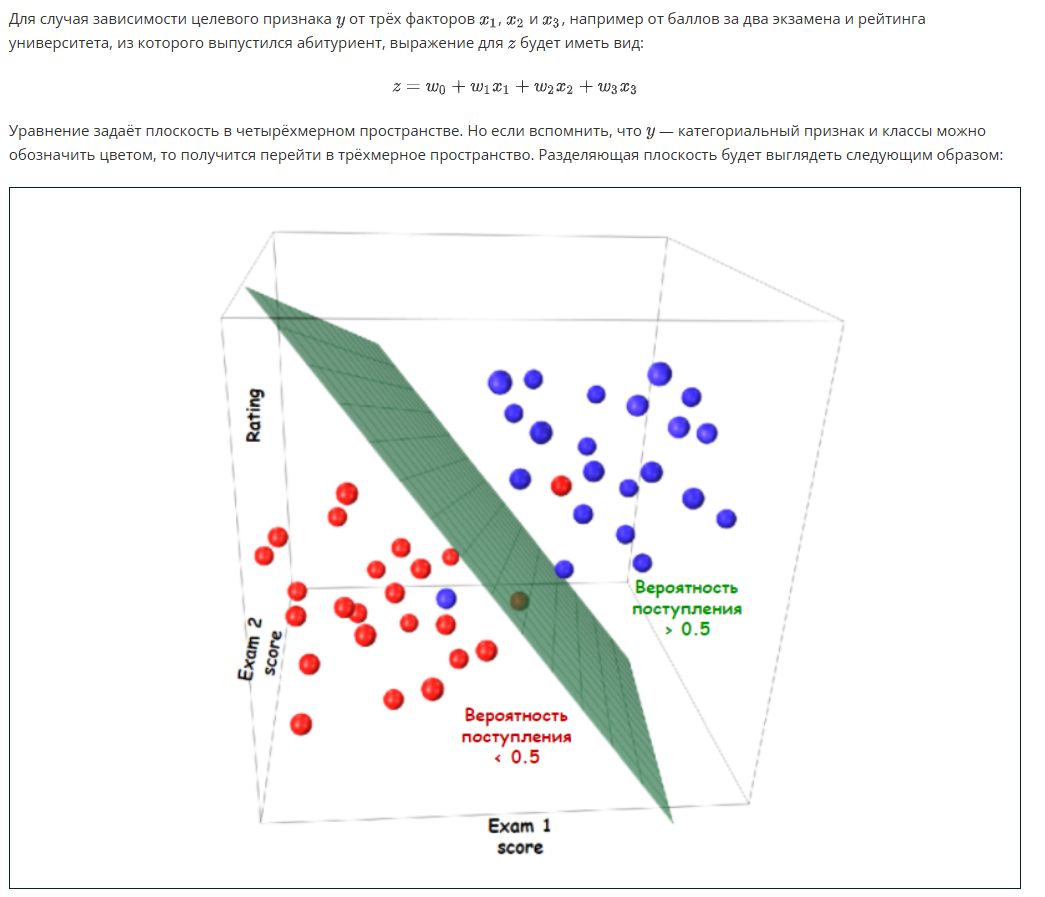

В общем случае, когда у нас есть зависимость от  факторов, линейное выражение, находящееся под сигмоидой, будет обозначать **разделяющую гиперплоскость**.

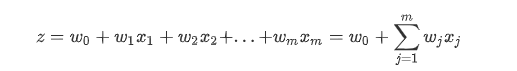